<a href="https://colab.research.google.com/github/norgaston/laboratorio1-bdml/blob/main/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import get_cmap
import numpy as np

dir = Path("/content/drive/MyDrive/Colab Notebooks/dataset_ventas") # directorio donde están los datasets (cambiar si hace falta)
# Leo los csv del directorio y los concateno en un dataframe
df = (pd.read_csv(f) for f in dir.glob("*.csv"))
df = pd.concat(df)
# Filtro el título
titulo = df.iloc[0]
# Filtra el DataFrame para eliminar las filas que coinciden con el título
df = df[df.apply(lambda row: not row.equals(titulo), axis=1)]
# Elimino los valores nulos del dataframe
df = df.dropna()
# Elimino las filas donde el ID no sea un número
df = df[df['ID de Pedido'].apply(lambda x: str(x).isdigit())]
# Restablece los índices si es necesario
df.reset_index(drop=True, inplace=True)
# Redondear 'Precio Unitario' a 2 decimales y convertirlo a float
df['Precio Unitario'] = df['Precio Unitario'].astype(float)
# Convertir 'Cantidad Pedida' a int
df['Cantidad Pedida'] = df['Cantidad Pedida'].astype(int)
df.drop_duplicates()
#df['Columna'].sum()
print("Precio promedio de los productos:", df['Precio Unitario'].mean())
print("Desviación estándar en el precio:", df['Precio Unitario'].std())
print("Precio más bajo:", df['Precio Unitario'].min())
print("Precio más alto:", df['Precio Unitario'].max())
print("Cantidad promedio pedida:", df['Cantidad Pedida'].mean())
#df['Columna'].median()
print("Cantidad mínima:", df['Cantidad Pedida'].min())
print("Cantidad máxima:", df['Cantidad Pedida'].max())

df['Precio Unitario'].unique()
df['Producto'].unique()

Precio promedio de los productos: 184.40066217081022
Desviación estándar en el precio: 332.7319842405589
Precio más bajo: 2.99
Precio más alto: 1700.0
Cantidad promedio pedida: 1.1243781897186864
Cantidad mínima: 1
Cantidad máxima: 9


array(['Bose SoundSport Headphones', 'Google Phone', 'Wired Headphones',
       'USB-C Charging Cable', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

<ipython-input-2-ef5fe7d884e4>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap('viridis', n_productos)


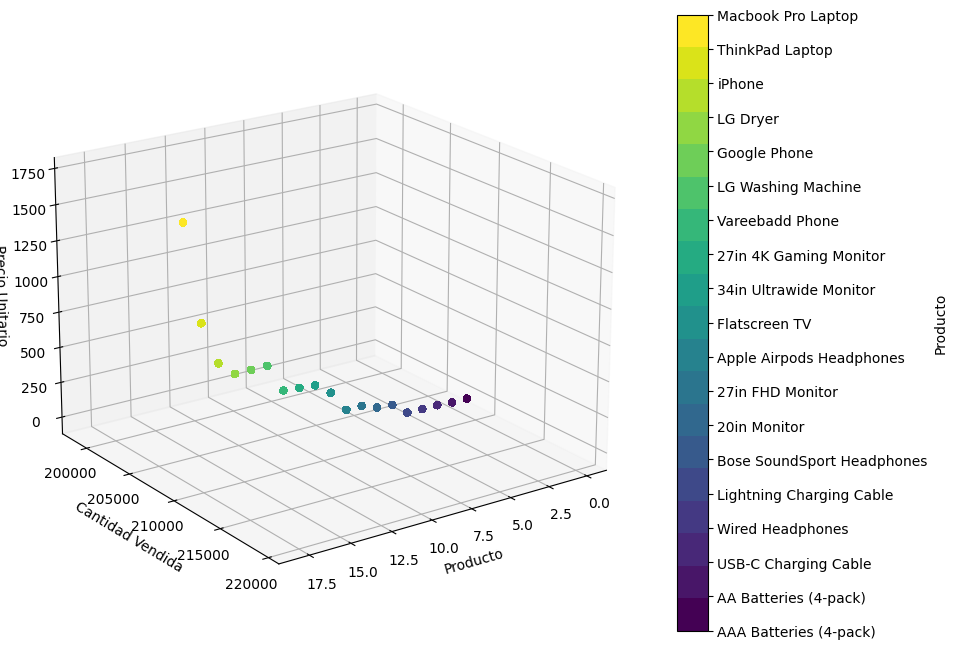

In [2]:
# Ordenar el DataFrame por la columna 'Precio Unitario' de forma ascendente
df = df.sort_values(by='Precio Unitario', ascending=True)

# Crear un diccionario que mapee productos a IDs únicos
productos_unicos = df['Producto'].unique()
producto_id_dict = {producto: i for i, producto in enumerate(productos_unicos)}

# Agregar una nueva columna 'Producto_ID' al DataFrame
df['Producto_ID'] = df['Producto'].map(producto_id_dict)

# Crear una figura 3D con un tamaño más grande
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear una paleta de colores única basada en la cantidad de productos
n_productos = len(df['Producto_ID'].unique())
colormap = get_cmap('viridis', n_productos)

# Crear el gráfico 3D con colores
scatter = ax.scatter(df['Producto_ID'], df['Cantidad Pedida'].sum(), df['Precio Unitario'], c=df['Producto_ID'], cmap=colormap)

# Configurar etiquetas de los ejes
ax.set_xlabel('Producto')
ax.set_ylabel('Cantidad Vendida')
ax.set_zlabel('Precio Unitario')

# Rotar el gráfico para una mejor visualización (opcional)
ax.view_init(elev=20, azim=55)

# Configurar una barra de colores para identificar los productos con etiquetas personalizadas
cbar = fig.colorbar(scatter, ax=ax, ticks=range(n_productos))
cbar.set_label('Producto')
cbar.set_ticklabels(productos_unicos)

# Mostrar el gráfico
plt.show()

In [3]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

df_copia = df
print(df_copia)

# Dividir la columna 'Dirección de Envío' en partes (Calle, Ciudad, Estado y Código Postal)
df_copia[['Calle', 'Ciudad', 'Estado CP']] = df['Dirección de Envio'].str.split(', ', n=2, expand=True)

# Dividir la columna 'Estado CP' en 'Estado' y 'Código Postal'
df_copia[['Estado', 'Código Postal']] = df['Estado CP'].str.split(' ', n=1, expand=True)

# Eliminar las columnas temporales 'Estado CP' y 'Dirección de Envío' si ya no las necesitas
df_copia.drop(columns=['Estado CP', 'Dirección de Envio'], inplace=True)


print(df_copia)
df_copia['Fecha de Pedido'] = pd.to_datetime(df_copia['Fecha de Pedido'])
mes = df_copia['Fecha de Pedido'].dt.month
df_copia['Cantidad Pedida'] = df_copia['Cantidad Pedida'].astype(int)
df_copia['Precio Unitario'] = df_copia['Precio Unitario'].astype(float)
df_copia['Monto Total'] = df_copia['Cantidad Pedida'] * df_copia['Precio Unitario']
# Agrupa los datos por mes y calcula la suma del monto total en cada mes
ventas_por_mes = df_copia.groupby(df_copia['Fecha de Pedido'].dt.month)['Monto Total'].sum().reset_index()
# Ordena el DataFrame por la columna de fecha
df_copia = df_copia.sort_values(by='Fecha de Pedido')
# Restablece los índices si es necesario
df_copia.reset_index(drop=True, inplace=True)
# La variable 'ventas_por_mes' contiene la suma de las ventas totales en cada mes
#print(df_copia)
# Muestra el resultado
#print(ventas_por_mes)
print("Mes con más ventas totales:", meses[ventas_por_mes['Monto Total'].idxmax()])
venta_mas_cara = df_copia['Monto Total'].idxmax()
print("Venta más cara en todo el año:\n", df_copia.iloc[venta_mas_cara])
# Agrupa los datos por día y calcula las ventas totales para cada día
df_copia['Ventas Totales'] = df_copia.groupby(df['Fecha de Pedido'].dt.date)['Monto Total'].transform('sum')
# Encuentra el día con las ventas totales más altas
dia_con_mas_ventas = df_copia[df_copia['Ventas Totales'] == df_copia['Ventas Totales'].max()]['Fecha de Pedido'].iloc[0].date()
dia_con_menos_ventas = df_copia[df_copia['Ventas Totales'] == df_copia['Ventas Totales'].min()]['Fecha de Pedido'].iloc[0].date()
# Imprime el resultado
print(f"Día con más ventas totales: {dia_con_mas_ventas}")
print(f"Día con menos ventas totales: {dia_con_menos_ventas}")
# Agrupa los datos por el nombre del producto y suma la cantidad vendida
productos_mas_vendidos = df.groupby('Producto')['Cantidad Pedida'].sum()
# Encuentra el producto más vendido
producto_mas_vendido = productos_mas_vendidos.idxmax()
cantidad_mas_vendida = productos_mas_vendidos.max()
# Imprime el resultado
print(f"El artículo más vendido es '{producto_mas_vendido}' con una cantidad vendida de {cantidad_mas_vendida}.")

# Extraer el mes de la fecha de pedido
df_copia['Mes'] = df_copia['Fecha de Pedido'].dt.month

# Agrupar por mes y producto, y calcular la cantidad total vendida en cada mes
ventas_por_mes_y_producto = df_copia.groupby(['Mes', 'Producto'])['Cantidad Pedida'].sum()

# Encontrar el producto más vendido en cada mes
productos_mas_vendidos_por_mes = ventas_por_mes_y_producto.groupby(level=0).idxmax()
print("Producto más vendido por mes:")
print(productos_mas_vendidos_por_mes)

       ID de Pedido                Producto  Cantidad Pedida  Precio Unitario  \
92974        211621  AAA Batteries (4-pack)                1             2.99   
120569       194731  AAA Batteries (4-pack)                1             2.99   
120574       194736  AAA Batteries (4-pack)                2             2.99   
28834        246807  AAA Batteries (4-pack)                1             2.99   
120597       194757  AAA Batteries (4-pack)                1             2.99   
...             ...                     ...              ...              ...   
45940        310737      Macbook Pro Laptop                1          1700.00   
99629        218013      Macbook Pro Laptop                1          1700.00   
2767         179222      Macbook Pro Laptop                1          1700.00   
179829       253463      Macbook Pro Laptop                1          1700.00   
165323       270183      Macbook Pro Laptop                1          1700.00   

       Fecha de Pedido     

In [4]:
# Crear el objeto figura
fig = go.Figure()

# Agregar un gráfico de barras al objeto figura
fig.add_trace(go.Bar(
    #x=ventas_por_mes['Fecha de Pedido'],
    x=meses,
    y=ventas_por_mes['Monto Total'],
    text=ventas_por_mes['Monto Total'],
    marker=dict(
        color=ventas_por_mes['Monto Total'],
        colorscale='RdYlGn',
        colorbar=dict(title="Total de ventas")
    ),
    name='Ventas Totales'
))

# Configurar títulos y ejes del gráfico
fig.update_layout(
    title=dict(
        text='Ventas Totales por Mes',
        x=0.5  # Centrar el título
    ),
    xaxis_title='Meses',
    yaxis_title='Ventas Totales'
)
# Guardar el gráfico en formato PNG
pio.write_image(fig, 'ventas_totales_por_mes.png')
# Mostrar el gráfico
fig.show()

In [5]:
ventas_por_hora = df_copia.groupby(df_copia['Fecha de Pedido'].dt.hour)['Cantidad Pedida'].sum()
print("Cantidad de ventas totales a una hora:\n", ventas_por_hora)
hora_max_ventas = ventas_por_hora.idxmax()
print("Hora donde más se vende:", hora_max_ventas)

Cantidad de ventas totales a una hora:
 Fecha de Pedido
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7000
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Cantidad Pedida, dtype: int64
Hora donde más se vende: 19


Teniendo en cuenta que se trata de productos electrónicos, los horarios de 11 AM, 12 PM (mediodía) y 7 PM (19 hs) en Estados Unidos pueden estar influenciados por patrones de compra específicos para estos productos:

11 AM: A esta hora, las personas pueden buscar productos electrónicos durante sus pausas en el trabajo o actividades diarias, lo que podría impulsar las ventas en tiendas en línea y minoristas.

12 PM (Mediodía): Al ser la hora del almuerzo, las compras de productos electrónicos pueden ser menos comunes en este momento, ya que las personas suelen enfocarse en las comidas. Sin embargo, las compras en línea desde dispositivos móviles podrían ser una opción.

7 PM: A las 7 PM, las ventas de productos electrónicos pueden experimentar un aumento, ya que las personas pueden dedicar tiempo a investigar y realizar compras después del trabajo o actividades diarias. Las ventas en línea y en tiendas físicas pueden ser más activas.

En resumen, el comportamiento de compra de productos electrónicos puede variar a lo largo del día, con un enfoque más destacado en las horas de la tarde y la noche, cuando las personas tienen más tiempo para explorar y adquirir estos productos. Las estrategias de marketing y ventas pueden adaptarse a estos patrones de compra para maximizar las ventas de productos electrónicos.

In [6]:
import plotly.graph_objects as go

horas = list(range(25))

# Crear el objeto figura
fig = go.Figure()

# Agregar un gráfico de barras al objeto figura
fig.add_trace(go.Bar(
    x=horas,  # Horas en el eje X
    y=ventas_por_hora.values,  # Cantidad Pedida en el eje Y
    text=ventas_por_hora.values,
    marker=dict(
        color=ventas_por_hora.values,
        colorscale='RdYlGn',
        colorbar=dict(title="Total de ventas")
    ),
    name='Ventas por Hora'
))

# Configurar títulos y ejes del gráfico
fig.update_layout(
        title=dict(
        text='Cantidad de Ventas por Hora',
        x=0.5  # Centrar el título
    ),
    #title='Cantidad de Ventas por Hora',
    xaxis_title='Hora del día',
    yaxis_title='Ventas Totales',
    xaxis=dict(
        tickmode='linear',  # Modo de marcado lineal
        tick0=0,  # Valor inicial
        dtick=1  # Intervalo de marcado (en este caso, 1 hora)
    )
)
# Guardar el gráfico en formato PNG
pio.write_image(fig, 'ventas_por_hora.png')
# Mostrar el gráfico
fig.show()

In [7]:
# Agrupar por ciudad y calcular las ventas totales
ventas_por_ciudad = df_copia.groupby('Ciudad')['Monto Total'].sum()

# Ordenar las ciudades en orden descendente según las ventas totales
ciudades_en_orden_descendente = ventas_por_ciudad.sort_values(ascending=False).index.tolist()

# Imprimir la lista de ciudades en orden descendente
print("Ciudades en orden descendente de ventas totales:")
print(ciudades_en_orden_descendente)

# Agrupar por estado y calcular las ventas totales
ventas_por_estado = df_copia.groupby('Estado')['Monto Total'].sum()

# Ordenar las ciudades en orden descendente según las ventas totales
estados_en_orden_descendente = ventas_por_estado.sort_values(ascending=False).index.tolist()

# Imprimir la lista de ciudades en orden descendente
print("Estados en orden descendente de ventas totales:")

def obtener_nombres_estados(codigos_estados):
    estados = {
        'CA': 'California',
        'NY': 'New York',
        'TX': 'Texas',
        'MA': 'Massachusetts',
        'GA': 'Georgia',
        'WA': 'Washington',
        'OR': 'Oregon',
        'ME': 'Maine'
        # Agrega más estados según sea necesario
    }

    # Utilizar comprensión de lista para obtener nombres de estado para cada código
    nombres_estados = [estados.get(codigo, 'Estado Desconocido') for codigo in codigos_estados]

    return nombres_estados

print(obtener_nombres_estados(estados_en_orden_descendente))

Ciudades en orden descendente de ventas totales:
['San Francisco', 'Los Angeles', 'New York City', 'Boston', 'Atlanta', 'Dallas', 'Seattle', 'Portland', 'Austin']
Estados en orden descendente de ventas totales:
['California', 'New York', 'Texas', 'Massachusetts', 'Georgia', 'Washington', 'Oregon', 'Maine']


In [8]:
ventas_por_ciudad = df.groupby('Ciudad')['Monto Total'].sum()

# Convertir la serie de ventas por ciudad en un nuevo DataFrame
ventas_ciudad_df = pd.DataFrame({'Ciudad': ventas_por_ciudad.index, 'Ventas Totales': ventas_por_ciudad.values})

# Mostrar las ventas totales por ciudad
print(ventas_ciudad_df)

# Graficar las ventas totales por ciudad
fig_ciudad = go.Figure(data=[go.Bar(x=ventas_ciudad_df['Ciudad'], y=ventas_ciudad_df['Ventas Totales'])])
fig_ciudad.update_layout(title='Ventas Totales por Ciudad', xaxis_title='Ciudad', yaxis_title='Ventas Totales')
# Guardar el gráfico en formato PNG
pio.write_image(fig_ciudad, 'ventas_por_ciudad.png')
fig_ciudad.show()


          Ciudad  Ventas Totales
0        Atlanta      2795498.58
1         Austin      1819581.75
2         Boston      3661642.01
3         Dallas      2767951.50
4    Los Angeles      5452570.80
5  New York City      4664317.43
6       Portland      2320490.61
7  San Francisco      8262203.91
8        Seattle      2747755.48


In [9]:
# Agrupar por estado y calcular las ventas totales
ventas_por_estado = df_copia.groupby('Estado')['Monto Total'].sum()

# Convertir la serie de ventas por estado en un nuevo DataFrame
ventas_estado_df = pd.DataFrame({'Estado': ventas_por_estado.index, 'Ventas Totales': ventas_por_estado.values})

# Mostrar las ventas totales por estado
print(ventas_estado_df)

# Graficar las ventas totales por estado
fig_estado = go.Figure(data=[go.Bar(x=ventas_estado_df['Estado'], y=ventas_estado_df['Ventas Totales'])])
fig_estado.update_layout(title='Ventas Totales por Estado', xaxis_title='Estado', yaxis_title='Ventas Totales')
# Guardar el gráfico en formato PNG
pio.write_image(fig_estado, 'ventas_por_estado.png')
fig_estado.show()

# Crear el gráfico de torta
fig = go.Figure(data=[go.Pie(labels=ventas_estado_df['Estado'], values=ventas_estado_df['Ventas Totales'])])

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Ventas Totales por Estado',
    title_x=0.5,  # Centrar el título
    font=dict(size=14),  # Tamaño de la fuente
)

# Guardar el gráfico en formato PNG
pio.write_image(fig, 'ventas_por_estado_pie.png')

# Mostrar el gráfico
fig.show()

  Estado  Ventas Totales
0     CA     13714774.71
1     GA      2795498.58
2     MA      3661642.01
3     ME       449758.27
4     NY      4664317.43
5     OR      1870732.34
6     TX      4587533.25
7     WA      2747755.48


In [10]:
# Extraer el día de la semana (lunes, martes, miércoles, etc.) de la fecha de pedido
df_copia['Día de la Semana'] = df_copia['Fecha de Pedido'].dt.day_name()

# Agrupar por día de la semana y calcular las ventas totales para cada día
ventas_por_dia_semana = df_copia.groupby('Día de la Semana')['Monto Total'].sum()

# Ordenar los días de la semana en el orden deseado (por ejemplo, de lunes a domingo)
# Ordenar los días de la semana en el orden deseado (por ejemplo, de lunes a domingo)
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_semana = ventas_por_dia_semana[dias_ordenados]

# Crear un gráfico de barras con Plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=ventas_por_dia_semana.index,
    y=ventas_por_dia_semana.values,
    #marker=dict(color='blue'),  # Color de las barras
))
fig.update_layout(
    title='Variación de Ventas a lo largo de la Semana',
    xaxis_title='Día de la Semana',
    yaxis_title='Ventas Totales',
    xaxis=dict(tickangle=45),  # Rotar etiquetas del eje x para una mejor visualización
)
fig.show()
print(ventas_por_dia_semana.describe())
print(ventas_por_dia_semana)

count    7.000000e+00
mean     4.927430e+06
std      8.649669e+04
min      4.839465e+06
25%      4.869621e+06
50%      4.904357e+06
75%      4.960496e+06
max      5.087957e+06
Name: Monto Total, dtype: float64
Día de la Semana
Monday       4883326.72
Tuesday      5087956.78
Wednesday    4988822.26
Thursday     4839465.16
Friday       4855914.48
Saturday     4904357.01
Sunday       4932169.66
Name: Monto Total, dtype: float64


Este análisis muestra cómo varían las ventas promedio a lo largo de la semana:

Los martes tienen el promedio de ventas más alto, lo que podría indicar que es un día fuerte para las ventas.
Los jueves tienen el promedio de ventas más bajo.
Los demás días de la semana tienen ventas promedio intermedias.
Estos datos pueden ser útiles para identificar patrones de ventas y tomar decisiones comerciales, como la programación de promociones o el ajuste de la asignación de personal en función de los días de la semana con un rendimiento superior o inferior en las ventas.

análisis de estos datos:

Cantidad de Observaciones (Count): Hay un total de 7 observaciones en tus datos, lo que sugiere que estás analizando las ventas durante una semana completa (probablemente cada día de la semana).

Promedio de Ventas (Mean): El promedio de ventas por día de la semana es de aproximadamente 4,927,430 unidades monetarias (la unidad monetaria no está especificada en los datos proporcionados). Esto indica el valor central de tus ventas diarias en esa semana.

Desviación Estándar (Std): La desviación estándar es de aproximadamente 8,649.67 unidades monetarias. Esta medida de dispersión muestra cuánto varían las ventas diarias con respecto al promedio. Una desviación estándar mayor indica una mayor variabilidad en las ventas.

Valor Mínimo (Min): El valor mínimo de las ventas diarias es de aproximadamente 4,839,465 unidades monetarias. Esto representa la venta más baja en un día de la semana durante ese período.

Percentil 25 (25%): El percentil 25 es de aproximadamente 4,869,621 unidades monetarias. Esto significa que el 25% de los días de la semana tuvieron ventas iguales o inferiores a este valor.

Mediana (50%): La mediana es de aproximadamente 4,904,357 unidades monetarias. Es el valor que se encuentra justo en el medio de todas las ventas diarias cuando se ordenan de menor a mayor.

Percentil 75 (75%): El percentil 75 es de aproximadamente 4,960,496 unidades monetarias. Esto significa que el 75% de los días de la semana tuvieron ventas iguales o inferiores a este valor.

Valor Máximo (Max): El valor máximo de las ventas diarias es de aproximadamente 5,087,957 unidades monetarias. Esto representa la venta más alta en un día de la semana durante ese período.

En resumen, estos datos estadísticos proporcionan una visión general de las ventas por día de la semana durante esa semana en particular. Puedes utilizar esta información para comprender mejor la distribución y variabilidad de las ventas y tomar decisiones basadas en ella, como identificar días excepcionalmente buenos o malos en términos de ventas.






In [11]:
# Calcular el promedio de ventas por mes
#df_copia['Fecha de Pedido'] = pd.to_datetime(df_copia['Fecha de Pedido'])  # Asegurarse de que la columna sea de tipo datetime
df_copia['Mes'] = df_copia['Fecha de Pedido'].dt.month  # Extraer el mes de la fecha
promedio_ventas_por_mes = df_copia.groupby('Mes')['Monto Total'].mean()

# Lista de fechas de días festivos (puedes personalizar esto según tus datos)
dias_festivos = ['2019-01-01', '2019-07-04', '2019-12-25']

# Calcular las ventas totales para cada período alrededor de los días festivos
ventas_alrededor_de_festivos = []

for festivo in dias_festivos:
    fecha_festivo = pd.to_datetime(festivo)
    inicio_periodo = fecha_festivo - pd.DateOffset(days=3)
    fin_periodo = fecha_festivo + pd.DateOffset(days=3)

    ventas_periodo = df_copia[(df_copia['Fecha de Pedido'] >= inicio_periodo) & (df_copia['Fecha de Pedido'] <= fin_periodo)]['Monto Total'].mean()
    ventas_alrededor_de_festivos.append((festivo, ventas_periodo))

# Convertir el promedio de ventas por mes en un DataFrame
df_promedio_ventas_mes = pd.DataFrame({'Mes': promedio_ventas_por_mes.index, 'Promedio Ventas Mensual': promedio_ventas_por_mes.values})

# Convertir el promedio de ventas alrededor de los festivos en un DataFrame
df_ventas_alrededor_festivos = pd.DataFrame(ventas_alrededor_de_festivos, columns=['Fecha del festivo', 'Promedio Ventas Festivo'])

# Unir ambos DataFrames en uno solo
df_comparacion = pd.merge(df_promedio_ventas_mes, df_ventas_alrededor_festivos, left_on='Mes', right_on=df_ventas_alrededor_festivos.index)

# Crear un gráfico de líneas para comparar los promedios
fig = go.Figure()

# Agregar una línea para el promedio de ventas mensuales
fig.add_trace(go.Scatter(x=df_comparacion['Mes'], y=df_comparacion['Promedio Ventas Mensual'], mode='lines+markers', name='Promedio Ventas Mensual'))

# Agregar una línea para el promedio de ventas alrededor de los festivos
fig.add_trace(go.Scatter(x=df_comparacion['Fecha del festivo'], y=df_comparacion['Promedio Ventas Festivo'], mode='lines+markers', name='Promedio Ventas Festivo'))

# Personalizar el gráfico
fig.update_layout(title='Comparación de Promedios de Ventas Mensuales y Festivos', xaxis_title='Mes/Festivo', yaxis_title='Promedio de Ventas')

# Mostrar el gráfico
fig.show()


print(df_promedio_ventas_mes)
print(df_ventas_alrededor_festivos)

    Mes  Promedio Ventas Mensual
0     1               187.687376
1     2               183.884962
2     3               185.250471
3     4               185.504231
4     5               190.305852
5     6               190.187565
6     7               185.249826
7     8               187.648849
8     9               180.497387
9    10               184.238580
10   11               182.074956
11   12               184.655913
  Fecha del festivo  Promedio Ventas Festivo
0        2019-01-01               199.068698
1        2019-07-04               190.573168
2        2019-12-25               180.746669


Estos datos muestran patrones de ventas en diferentes meses y alrededor de días festivos específicos. Por ejemplo, parece que las ventas son más altas en mayo y junio, y que el Día de Año Nuevo tiene un promedio de ventas particularmente alto. Esto puede ser útil para tomar decisiones comerciales, como la planificación de promociones o la gestión de inventario durante períodos de ventas más altas.